In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,f1_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import r2

In [2]:
df=pd.read_csv('datasets\insuranceFraud.csv')
df.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,10/17/2014,6/27/2006,9/6/2000,5/25/1990,6/6/2014
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


In [3]:
noise=[]
for j in df['umbrella_limit']:
    try:
        float(j)
    except:
        noise.append(j)
print(*noise)


In [4]:
df=df.drop('insured_hobbies',axis=1)
df=df.drop('insured_education_level',axis=1)
df=df.drop('insured_occupation',axis=1)
df=df.drop('insured_relationship',axis=1)
df=df.drop('incident_date',axis=1)
df=df.drop('incident_state',axis=1)
df=df.drop('incident_city',axis=1)
df=df.drop('incident_location',axis=1)
df=df.drop('auto_make',axis=1)
df=df.drop('auto_model',axis=1)
df=df.drop('policy_bind_date',axis=1)

df=df.drop('witnesses',axis=1)
df=df.drop('police_report_available',axis=1)

In [5]:
desc = pd.DataFrame(index=list(df))
desc['count']=df.shape[0] 
desc['null']=df.isnull().sum()
desc['unique']=df.nunique()
desc['dtype']=df.dtypes
desc=pd.concat([desc,df.describe().T],axis=1)
desc

,count,null,unique,dtype,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000,0,391,int64,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000,0,46,int64,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000,0,1000,int64,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_state,1000,0,3,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,0,3,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000,0,3,int64,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000,0,991,float64,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000,0,11,int64,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000,0,995,int64,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
insured_sex,1000,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
num_col=['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']
cat_col=['policy_state','policy_csl','insured_sex','incident_type','collision_type','incident_severity','authorities_contacted','property_damage','fraud_reported']

In [7]:
scaler=StandardScaler()
df[num_col]=scaler.fit_transform(df[num_col])
encoder=LabelEncoder()
df[cat_col]=df[cat_col].apply(encoder.fit_transform)


In [8]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,1.078140,0.990836,-0.095953,2,1,-0.222383,0.616705,-0.479476,-0.489529,1,...,-0.956261,-0.823865,2,0.009759,0.714257,-0.189283,1.165505,0.749653,-0.183440,1
1,0.208995,0.334073,-0.791527,1,1,1.412784,-0.242521,1.697980,-0.461008,1,...,-0.524475,-0.823865,0,-1.210174,-1.807312,-1.363822,-1.372696,-1.823346,0.315491,1
2,-0.608002,-1.088913,0.550566,2,0,1.412784,0.642233,1.697980,-0.984885,0,...,-0.668404,1.140056,1,1.229693,-0.686362,0.054644,-0.736072,-0.785565,0.315491,0
3,0.452355,0.224613,-1.239334,0,1,1.412784,0.652886,2.133471,1.491682,0,...,-0.956261,-0.823865,0,0.009759,0.403135,-0.224130,-0.219722,0.677607,1.479664,1
4,0.208995,0.552994,-0.695834,0,2,-0.222383,1.341980,2.133471,1.527808,1,...,1.202666,-0.823865,1,-1.210174,-1.753121,-1.257232,-1.399654,-1.768252,0.648112,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.539740,2,2,-0.222383,0.222884,-0.479476,-0.975717,0,...,1.202666,-0.823865,2,-1.210174,1.305049,2.051155,0.273817,1.224309,0.149180,0
996,0.704407,0.224613,-1.398429,0,0,-0.222383,0.739141,-0.479476,1.492519,0,...,1.634452,-0.823865,2,1.229693,2.111466,2.182342,2.214794,1.821868,1.645974,0
997,-0.642767,-0.541611,1.448920,2,1,-1.039966,0.520739,0.826998,-0.815138,0,...,-1.100189,1.140056,0,1.229693,0.558507,0.013648,0.020826,0.771902,-1.513924,0
998,2.208028,2.523284,-0.047867,0,2,1.412784,0.411866,1.697980,-0.830250,1,...,-1.388046,-0.823865,0,-1.210174,-0.219110,-0.453708,-0.451976,-0.073580,-1.181303,0


<Axes: >

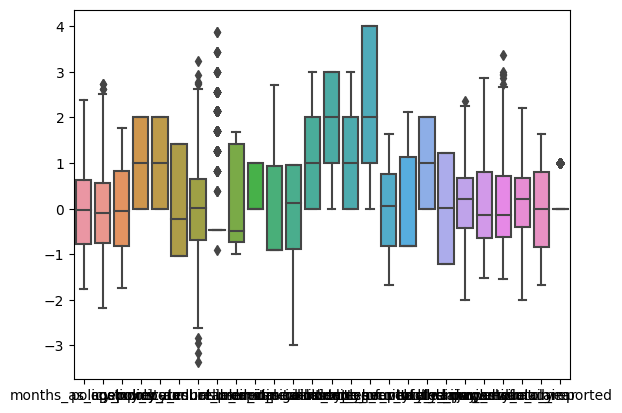

In [9]:
sns.boxplot(df)

In [10]:
#outlier
z_scores=np.abs(zscore(df))

In [11]:
zscore_threshold = 2

In [12]:
outliers=(z_scores>zscore_threshold).any(axis=1)
new_df=df[~outliers]

In [13]:
new_df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,1.078140,0.990836,-0.095953,2,1,-0.222383,0.616705,-0.479476,-0.489529,1,...,-0.956261,-0.823865,2,0.009759,0.714257,-0.189283,1.165505,0.749653,-0.183440,1
1,0.208995,0.334073,-0.791527,1,1,1.412784,-0.242521,1.697980,-0.461008,1,...,-0.524475,-0.823865,0,-1.210174,-1.807312,-1.363822,-1.372696,-1.823346,0.315491,1
2,-0.608002,-1.088913,0.550566,2,0,1.412784,0.642233,1.697980,-0.984885,0,...,-0.668404,1.140056,1,1.229693,-0.686362,0.054644,-0.736072,-0.785565,0.315491,0
5,0.452355,0.005692,-1.718900,2,1,-0.222383,0.388018,-0.479476,-0.317564,0,...,1.058738,1.140056,1,-1.210174,0.429662,-0.209781,-0.205206,0.707273,-0.349751,1
7,-0.338567,-0.213229,-0.456193,0,0,-0.222383,-0.489156,-0.479476,1.423002,1,...,1.634452,1.140056,0,1.229693,-0.044411,0.399011,0.410680,-0.270117,1.645974,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.713099,0.443534,0.455180,0,0,-1.039966,1.262159,0.826998,-0.328895,0,...,0.914809,-0.823865,0,1.229693,-0.700004,-0.742731,-0.744367,-0.596444,1.313353,0
991,0.461047,0.552994,-1.700226,2,0,-0.222383,0.100284,-0.479476,-0.938154,1,...,1.346595,-0.823865,1,-1.210174,-0.219110,-1.523707,-0.451976,0.202950,-0.516061,0
993,-0.694916,-1.198374,0.499471,2,1,-0.222383,-0.087140,-0.479476,-0.804394,1,...,1.202666,1.140056,0,-1.210174,0.281869,-0.289724,-0.286081,0.541990,1.147043,0
994,-0.547162,-0.979453,0.526389,1,2,-0.222383,0.371381,-0.479476,-0.984424,1,...,-0.812332,-0.823865,0,0.009759,-1.753879,-1.413017,-1.310485,-1.751830,-1.513924,0


In [14]:
new_df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [15]:
x=new_df.loc[:,['months_as_customer', 'age', 'policy_number', 'policy_state','policy_csl', 'policy_deductable', 'policy_annual_premium','umbrella_limit', 'insured_zip', 'insured_sex', 'capital-gains','capital-loss', 'incident_type', 'collision_type', 'incident_severity','authorities_contacted', 'incident_hour_of_the_day','number_of_vehicles_involved', 'property_damage', 'bodily_injuries','total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim','auto_year']]
y=new_df.loc[:,'fraud_reported']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [17]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test,y_pred)
print("acc:",accuracy)

acc: 0.8110599078341014


In [20]:
cm=confusion_matrix(y_test,y_pred)

In [21]:
TP = cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

In [22]:
print(TP,TN,FP,FN)

12 164 16 25


In [23]:
precision = TP/(TP+FP)
print(precision)

0.42857142857142855


In [24]:
Recall = TP/(TP+FP)
print(Recall)

0.42857142857142855


In [25]:
f1 = f1_score(y_test,y_pred)
f1

0.3692307692307692

logistic regression

In [26]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,1.078140,0.990836,-0.095953,2,1,-0.222383,0.616705,-0.479476,-0.489529,1,...,-0.956261,-0.823865,2,0.009759,0.714257,-0.189283,1.165505,0.749653,-0.183440,1
1,0.208995,0.334073,-0.791527,1,1,1.412784,-0.242521,1.697980,-0.461008,1,...,-0.524475,-0.823865,0,-1.210174,-1.807312,-1.363822,-1.372696,-1.823346,0.315491,1
2,-0.608002,-1.088913,0.550566,2,0,1.412784,0.642233,1.697980,-0.984885,0,...,-0.668404,1.140056,1,1.229693,-0.686362,0.054644,-0.736072,-0.785565,0.315491,0
3,0.452355,0.224613,-1.239334,0,1,1.412784,0.652886,2.133471,1.491682,0,...,-0.956261,-0.823865,0,0.009759,0.403135,-0.224130,-0.219722,0.677607,1.479664,1
4,0.208995,0.552994,-0.695834,0,2,-0.222383,1.341980,2.133471,1.527808,1,...,1.202666,-0.823865,1,-1.210174,-1.753121,-1.257232,-1.399654,-1.768252,0.648112,0


Calculate the TPR, FPR, TNR, FNR, Recall, Precision, and F1 Score for the below table. Calculate it for the following thresholds.
- 0.4
- 0.55
- 0.8

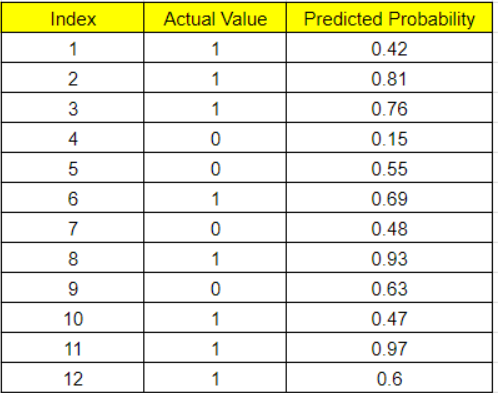

In [56]:
Actual_Values= [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]
Predicted_Probabilities=[0.42, 0.81, 0.76, 0.15, 0.55, 0.69, 0.48, 0.93, 0.63, 0.47, 0.97, 0.6]
pred_val = [1 if i >= 0.4 else 0 for i in Predicted_Probabilities]

In [57]:
cm2=confusion_matrix(Actual_Values,pred_val)
# Calculate Precision
precision = precision_score(Actual_Values, pred_val)

# Calculate Recall
recall = recall_score(Actual_Values, pred_val)

# Calculate F1 Score
f1 = f1_score(Actual_Values, pred_val)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7272727272727273
Recall: 1.0
F1 Score: 0.8421052631578948


In [58]:

TN=cm2[0,0]
FP=cm2[0,1]
FN=cm2[1,0]
TP = cm2[1,1]

In [59]:

print("TN:",TN)
print("FP:",FP)
print("FN:",FN)
print("TP:",TP)

TN: 1
FP: 3
FN: 0
TP: 8


<Axes: >

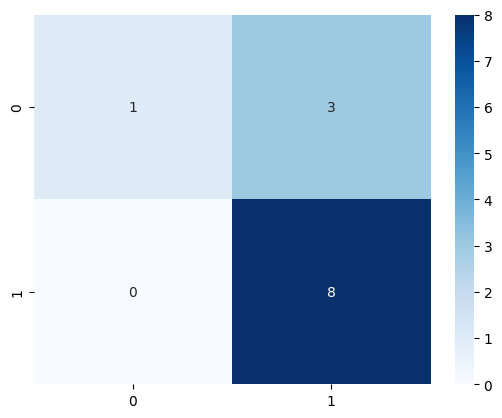

In [60]:
sns.heatmap(cm2,annot=True,fmt='d',cmap='Blues')

In [61]:
Actual_Values= [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]
Predicted_Probabilities=[0.42, 0.81, 0.76, 0.15, 0.55, 0.69, 0.48, 0.93, 0.63, 0.47, 0.97, 0.6]
pred_val = [1 if i >= 0.55 else 0 for i in Predicted_Probabilities]

Precision: 0.75
Recall: 0.75
F1 Score: 0.75
TN: 2
FP: 2
FN: 2
TP: 6


<Axes: >

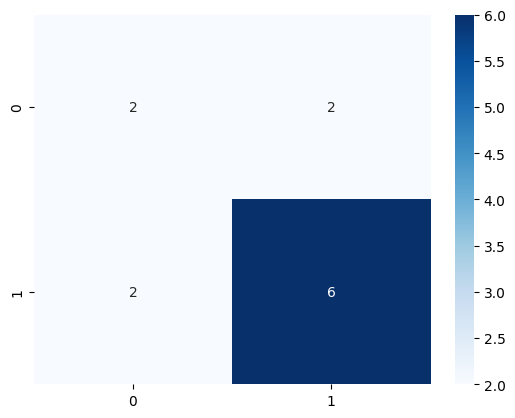

In [62]:
cm2=confusion_matrix(Actual_Values,pred_val)
# Calculate Precision
precision = precision_score(Actual_Values, pred_val)

# Calculate Recall
recall = recall_score(Actual_Values, pred_val)

# Calculate F1 Score
f1 = f1_score(Actual_Values, pred_val)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

TN=cm2[0,0]
FP=cm2[0,1]
FN=cm2[1,0]
TP = cm2[1,1]

print("TN:",TN)
print("FP:",FP)
print("FN:",FN)
print("TP:",TP)
sns.heatmap(cm2,annot=True,fmt='d',cmap='Blues')


In [63]:
Actual_Values= [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]
Predicted_Probabilities=[0.42, 0.81, 0.76, 0.15, 0.55, 0.69, 0.48, 0.93, 0.63, 0.47, 0.97, 0.6]
pred_val = [1 if i >= 0.8 else 0 for i in Predicted_Probabilities]

Precision: 1.0
Recall: 0.375
F1 Score: 0.5454545454545454
TN: 4
FP: 0
FN: 5
TP: 3


<Axes: >

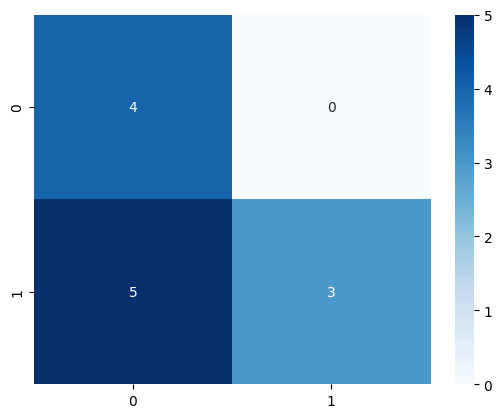

In [64]:
cm2=confusion_matrix(Actual_Values,pred_val)
# Calculate Precision
precision = precision_score(Actual_Values, pred_val)

# Calculate Recall
recall = recall_score(Actual_Values, pred_val)

# Calculate F1 Score
f1 = f1_score(Actual_Values, pred_val)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
TN=cm2[0,0]
FP=cm2[0,1]
FN=cm2[1,0]
TP = cm2[1,1]
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)
print("TP:",TP)
sns.heatmap(cm2,annot=True,fmt='d',cmap='Blues')


You want to build a logistic regression model to predict whether a customer will purchase a product based on their age.
 Given the following data points: Age: [25, 30, 35, 40, 45] Purchased: [0, 1, 1, 0, 1] 
 
 Calculate the coefficients and intercept of the logistic regression model using maximum likelihood estimation.
  Then, use the model to predict the probability of a 37-year-old customer making a purchase.

In [65]:
Age= [25, 30, 35, 40, 45] 
Purchased= [0, 1, 1, 0, 1] 

In [66]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Data
age = np.array([25, 30, 35, 40, 45])
purchased = np.array([0, 1, 1, 0, 1])

# Reshape age to a 2D array since scikit-learn expects input in this format
age = age.reshape(-1, 1)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(age, purchased)

# Extract the coefficients and intercept
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

print("Intercept (beta0):", intercept)
print("Coefficient (beta1):", coefficient)

# Use the model to predict the probability of a 37-year-old customer making a purchase
age_to_predict = np.array([[37]])  # Reshape to 2D array
probability_purchase = model.predict_proba(age_to_predict)[:, 1]

print("Probability of a 37-year-old customer making a purchase:", probability_purchase[0])


Intercept (beta0): -2.5754739319718736
Coefficient (beta1): 0.08621708018055023
Probability of a 37-year-old customer making a purchase: 0.6489798489698


You are working for a company that sells laptops online and want to build a linear regression model to predict the price of a laptop based on various features. You collected data on 1000 laptops that have the following features: RAM (in GB), Processor Speed (in GHz), Hard Disk Capacity (in GB), Screen Size (in inches), and Battery Life (in hours). However, you suspect that there might be multicollinearity between the features. Given the following data points, calculate the slope and intercept of the best-fit line using linear regression, and also identify which features have multicollinearity:

RAM: [4, 8, 16, 32, 64] Processor Speed: [2.2, 2.5, 2.8, 3.2, 3.5] Hard Disk Capacity: [256, 512, 1024, 2048, 4096] Screen Size: [13, 14, 15, 16, 17] Battery Life: [5, 7, 9, 11, 13] Price: [800, 1200, 1800, 2800, 5000]

Hint: You can use a correlation matrix to identify multicollinearity.

In [68]:
RAM= [4, 8, 16, 32, 64] 
Processor_Speed= [2.2, 2.5, 2.8, 3.2, 3.5] 
Hard_Disk_Capacity= [256, 512, 1024, 2048, 4096] 
Screen_Size= [13, 14, 15, 16, 17] 
Battery_Life= [5, 7, 9, 11, 13] 
Price= [800, 1200, 1800, 2800, 5000]

In [69]:
dfy = pd.DataFrame({'RAM': RAM, 'Processor_Speed': Processor_Speed, 'Hard_Disk_Capacity': Hard_Disk_Capacity, 'Screen_Size': Screen_Size, 'Battery_Life': Battery_Life, 'Price': Price})
dfy

,RAM,Processor_Speed,Hard_Disk_Capacity,Screen_Size,Battery_Life,Price
0,4,2.2,256,13,5,800
1,8,2.5,512,14,7,1200
2,16,2.8,1024,15,9,1800
3,32,3.2,2048,16,11,2800
4,64,3.5,4096,17,13,5000


In [75]:
x=dfy[['RAM','Processor_Speed','Hard_Disk_Capacity','Screen_Size','Battery_Life']]
y=dfy['Price']

In [76]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Get the coefficients (slopes) and intercept
slopes = model.coef_
intercept = model.intercept_

print("Slopes (coefficients):", slopes)
print("Intercept:", intercept)


Slopes (coefficients): [ 1.59224738e-02 -1.62500000e+03  1.01903832e+00  1.19375000e+02
  2.38750000e+02]
Intercept: 1377.812499999916


In [78]:
cor_mat=dfy.corr()

<Axes: >

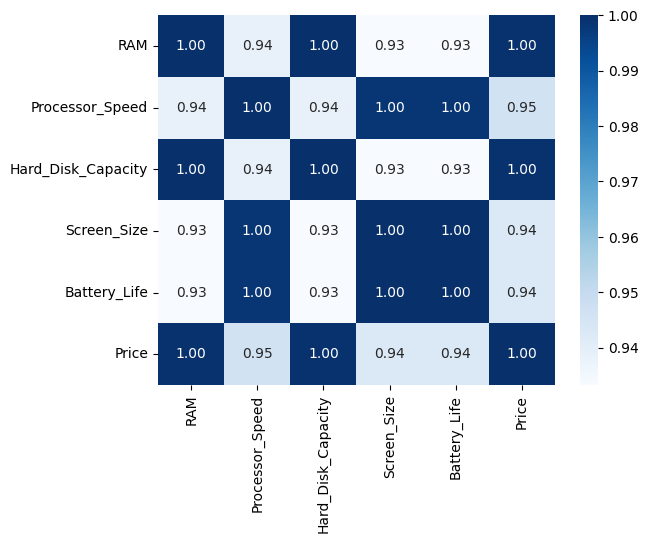

In [79]:
sns.heatmap(cor_mat,annot=True,fmt='.2f',cmap='Blues')